# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


Shape del dataset: (344, 7)

Valori mancanti per colonna:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Numero di righe duplicate: 0

Massa corporea media per specie:
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


C:\Users\sanic\AppData\Local\Temp\ipykernel_15780\3373526973.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex"].fillna(most_common_sex, inplace=True)


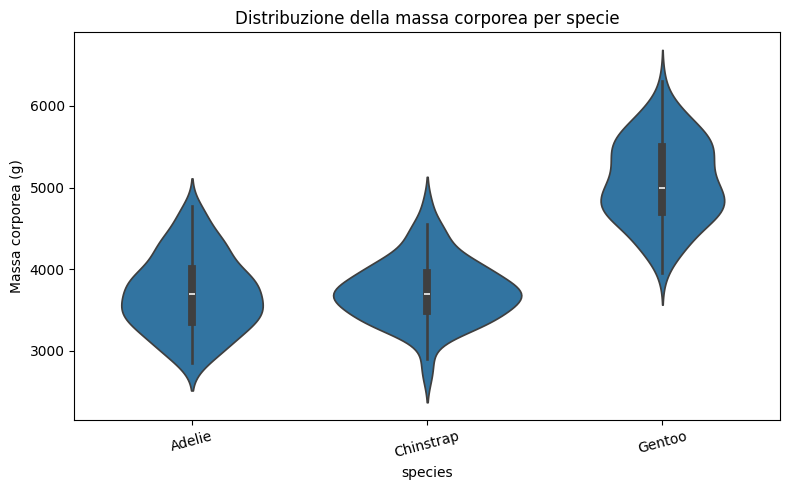

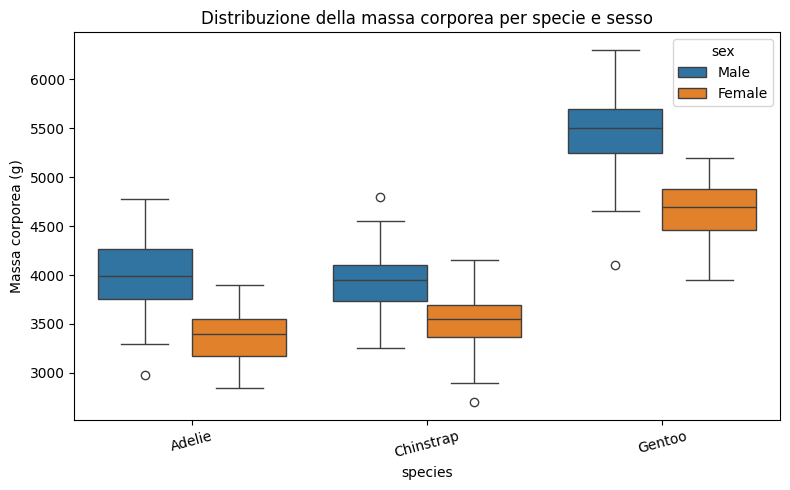

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1. Quante righe e colonne ha il dataset?
df = sns.load_dataset("penguins")
print("Righe e colonne dataset:", df.shape)

# 2. Valori mancanti per colonna
print("\nValori mancanti per colonna:")
print(df.isnull().sum())

# 3. Riempi i valori mancanti in 'sex' con il valore più frequente (moda)
most_common_sex = df["sex"].mode()[0]
df["sex"].fillna(most_common_sex, inplace=True)

# 4. Rimuovi le righe con body_mass_g mancante
df = df.dropna(subset=["body_mass_g"])

# 5. Controlla righe duplicate
print("\nNumero di righe duplicate:", df.duplicated().sum())

# 6. Calcola la massa corporea media per specie
mean_mass_by_species = df.groupby("species")["body_mass_g"].mean()
print("\nMassa corporea media per specie:")
print(mean_mass_by_species)

# 7. Visualizza la distribuzione della massa corporea per specie
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="species", y="body_mass_g")
plt.title("Distribuzione della massa corporea per specie")
plt.ylabel("Massa corporea (g)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 8. Visualizza la distribuzione per specie e sesso (con hue)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="species", y="body_mass_g", hue="sex")
plt.title("Distribuzione della massa corporea per specie e sesso")
plt.ylabel("Massa corporea (g)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
